## Feature Selection and Dimensionality Reduction: On Santander  and a UCI Datasets

It is fairly common knowledge in the data-science circle that much of the time and effort for a given project goes into data munging and wrangling. This includes the steps to sufficiency-evaluation, cleaning, transforming and "data-typesetting" for it to work as in input to machine learning models. This can be often critically important for problems that use with Deep Learning models (in many cases even for complex SVM models). A lot of effort is spent on algorithms that transform the data into an input-able form for multi-layered neural network. Identifying and debugging nodes in a multilayered network can be a ardously complicated task since, just a few layers in, input data is transformed and redistributed at a binary level beyond human abstractions. I will cover this topic on neural network in a separate post. 

This post is about the importance of feature selection in more commonly used machine learning models. It deals with pruning features which do not determine the dependent variable in a significant way. 

Feature selection is important for the following key reasons:

1 > Computational Intensity: While the increase in the number of features can contribute to a general improvement in the trainability of the model to learn the rules among the variables, if the variables grow to a high number, say in excess of 100, even a simple regression model can demand a lot of computational resources. This is a key consideration while performing real-time analytics. 

2 > Interpretability: having too many features will not help make sense of what is going on. By deploying distributed computing platforms we can build sophisticated models on a dataset with excessive number of features, but even if the model meets our performance metrics, it does not mean we can intuitively interpret what is going on. It is important uncover the mechanisms leading to our predictions for a data scientist to develop domain expertise over time, especially so when working for a particular industry. Presence of too many features will hinder model interpretability. 

3 > Communication: closely linked to interpretability is the element of communication. Models which are hard to interpret are hard to communicate. Outcomes of analysis will invariably need to be communicated to non-technical professionals who expect to gain an intuitive understanding of a technical subject matter, and models which are too complex are usually not convincing.

4 > Ensemble entanglement: this is a relatively infrequent problem to address, but it exists nonetheless. There are cases where traditional ML models do not meet performance metrics for acceptance. In such cases, the data scientist explores ensemble models for improving performance. Presence of high number of features can complicate an ensemble model beyond comprehension and can create massive performance distortion on the test-set vs. the training set. Such situations should be avoided.

5 > Business actionability: perhaps the most valuable outcome of undertaking a scientific analysis of data is the insights we can derive from it. It helps us better understand our customers, our processes, our employees, and competitors, among others. Data analysis can help us identify shortcomings and gaps in performance and highlight the areas of process improvement. Having a manageable number of features is key to distilling actionable business intelligence from data analyses projects. As we will see from the Santander Bank's dataset illustration, having a high number of features precludes us from drawing actionable intelligence from analyses.  

#### Dealing with the problem

There are a number of options to deal with excessive number of features in the data preparation phase. This process is known as feature selection. It is important to note that the selection of method depends on the problem at hand.

Feature selection is NOT to be confused with dimensionality reduction. 

Some common approaches include:

1> Domain knowledge: one of the most effective ways to prune excessive number of features. Having an deep understanding of the company's business model, customer profile and the operating environment can help weed out unnecessary variables from the dataset. A word of caution is warranted here: using this process analyst's bias can creep-in to reduce dataset features to fit a preconceived model, and this should be avoided.   

2> Shuffling methods: in this approach all the variables are included in the training model and the system creates a baseline fit score. As the modeling activity progresses, a group variables is randomized and added and the variations in the reference scores are compared. If a specific feature is dropped and the reference score (error rate) goes down (increases) then probably the feature dropped was important. If the reference error does not change upon dropping a feature, then the feature is probably not important. 

3> Backward Elimination & Forward Selection: a more traditional approach to feature selection is using the backward elimination and forward selection. In foward selection the outcome is modelled one (or few) feature at a time and the impact is examined. Significant features are retained in the model and others are excluded. A good starting point for this is by examining the correlation matrix. In backward elimination, the outcome is modeled on all the available features and significance of each feature is evaluated and earmarked. A significance level is set (e.g. p = 0.05) and features not satisfying this p value are eliminated. While both these approaches can be very time consuming, the process of carrying it out can trigger novel ideas to modeling with new feature engineering and help lay down a foundation for better interpretation.

4> Using built-in functions: A more practical approach to feature selection is by using built-in functions. 

For the purpose of illustration we will use the following libraries:

Scikit-learn's - RFE, 'percentile selection' and 'principal component analysis' for dimensionality reduction

R's            - 'fsCaret' package

#### About the dataset and the illustration

Specifics of the model and data used here:

Dataset 1 link: 			https://tinyurl.com/n69koxd from UCI ML Repository

Dataset 2 link:             https://tinyurl.com/ybq8qy2d from Kaggle library

Modeling language: 		Python 3 and R
Modeling environment: 	Jupyter Notebooks, Spyder, and RStudio
Primary libraries used: matplotlib, pandas, seaborn, scikit-learn, numpy, dplyr, rpart, caret, fsCaret 

Brief overview of the Dataset 1:

The data pertains to the success of telemarketing campaign carried out by a Portuguese banking institution. The dataset 
provides us with a binary classification problem. The success of the campaign is measured by how many clients subscribe 
to the term-deposit offer made by the institution. The “success” is the classification variable of interest represented by “1” (the other outcome is “failure” / “0”). Together with 9 numeric variables, and 11 categorical variables, the data contains a set of 20 features, not including the classification variable.

Brief overview of the Dataset 2:

The data pertains to customer satisfaction of Santander bank's customers. The dataset provides us with a binary classification problem. The performance of model is measured by how accurately it can classify a satisfied and dissatisfied customers. The “success” is the classification variable of interest represented by “1” for a dissatisfied customer (the other outcome is “failure” / “0”). The dataset contains an extraordinary number of features at a total of 370, not including the dependent variable. 

In [1]:
#Import the most commonly used libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Since we used this dataset in an earlier post ("01 Classifier_Models..."). 
#In the interest of efficiency, let us skip the preprocessing steps and use the preprocessed dataset we created earlier.
#The dateset imported here is already labeled, encoded and scaled.

df = pd.read_csv('X_process_data.csv')
df.drop(labels="Unnamed: 0", axis=1, inplace=True)
df.head()

,age,duration,p_days,Previous,emp_var_rate,cpi,cci,euribor3m,no_emp,divorced,...,37,39,40,41,42,43,56,failure,nonexistent,success
0,56,261,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,149,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,226,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,151,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56,307,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
df.columns

Index(['age', 'duration', 'p_days', 'Previous', 'emp_var_rate', 'cpi', 'cci',
       'euribor3m', 'no_emp', 'divorced',
       ...
       '37', '39', '40', '41', '42', '43', '56', 'failure', 'nonexistent',
       'success'],
      dtype='object', length=104)

In [4]:
#Separating the dependent and independent variables 

X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [5]:
#split the dataset for training and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
#Scale the features for more accurate models and to conserve computational resources 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
#Let's use the SciKit's LogisticRegressor
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(max_iter=200, C=0.5)

### 1. Feature Selection using RFE Method

In [ ]:
# Examining feature selection by using scikit's RFE for this model
from sklearn.feature_selection import RFE

In [ ]:
#RFE for Logistic regression model, let's select the top 7 variables

rfe_logit = RFE(logit_model, 7) 
rfe_logit = rfe_logit.fit(X_train, y_train)
print(rfe_logit.support_)
print(rfe_logit.ranking_)

In [ ]:
feat_list_logit = []

for i in range(0, 103):
    if rfe_logit.support_[i]==True:
        feat_list_logit.append(i)

In [ ]:
feat_list_logit

This shortlist of features which impacts the outcome makes sense intutively. 
This refers to the following features:

2 - 'duration'

3 - 'p_days'

7 - 'cci'

8 - 'euribor3m'

21 - 'job'

101 - 'campaign'

102 - 'poutcome'

### 2. Model based Feature Selection

In [8]:
#This approach for feature selection is adapted from 
#"Hands-On Machine Learning with Scikit-Learn & TensorFlow" by A. Geron (O'Reilly Publishing)

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

select = SelectFromModel(LogisticRegression(), threshold='mean')

In [9]:
select.fit(X_train, y_train)
X_train_s = select.transform(X_train)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
print('The shape of X_train is: ', X_train.shape)
print('The shape of X_train_s is ', X_train_s.shape)

The shape of X_train is:  (32950, 103)
The shape of X_train_s is  (32950, 4)


Text(0.5,0,'Index of Features')

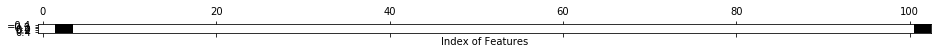

In [11]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of Features')

In [12]:
X_train_s

array([[ 0.193482  , -0.34988944, -0.34109189,  0.39827152],
       [ 0.193482  , -0.34988944, -0.34109189,  0.39827152],
       [ 0.193482  , -0.34988944, -0.34109189,  0.39827152],
       ..., 
       [ 0.193482  , -0.34988944, -0.34109189,  0.39827152],
       [ 0.193482  , -0.34988944, -0.34109189,  0.39827152],
       [ 0.193482  , -0.34988944, -0.34109189,  0.39827152]])

### 3 Feature Selection using 'fsCaret' in R

For illustrating feature selection using the fscaret package, let's make use of Dataset 2. This dataset pertains to Santander Bank's customer satisfaction. The dataset contains large number of features, a total of 371 and a total of 76020 observations (a total of over 28 million data points). Conjecturing about the environment in which this data might have been generated, this is a very large dataset. There's a good possibility that the data would contain a lot of noise given the sheer number of variables. It's important to note that we do not have background information on how the data was generated, and we can only proceed with what we have on hand.

The target variable denotes a "satisfied" (0) or "dissatisfied" (1) customer of the bank. 

R's 'fscaret' ranks the importance of different features for a given set of machine learning models built within the fscaret package. The package has over a hundered models and, from what I saw, almost all the mainstream models are built-in. So if we're looking to implement a RandomForest classifier for this model and if we want to select the top 20 features from the dataset, this package is of great help. It is very good for feature selctions to fit ensemble models, but more on that some other time. 

For this example, I ran feature selections for three models namely: lasso regression, logistic regression and decision trees.  I picked the models mainly for computational efficiency since feature selection would take hours. 


(PS: I haven't had the chance to get myself going on RMarkdown, else I would not have to post my R codes here on Jupyter Notebook. I apologize for that.)

In [ ]:
san_df = pd.read_csv('data2.csv')
san_df.head()

#### R Code:



library(dplyr)

library(caret)

library(fscaret)

datasource: https://www.kaggle.com/c/santander-customer-satisfaction/data

df <- as.tbl(read.csv('santander_train.csv')) #use dplyr format for better data manipulation and transparent virtualization

library(caTools)
split = sample.split(df$TARGET, SplitRatio = 0.8)

training_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

before running fscaret, check out the available fit models using 
> data(funcRegPred)
> print(funcRegPred)

sel_mods <- c("glm", "treebag", "lasso") 

selected_fs <-fscaret(training_set, test_set, myTimeLimit = 120, preprocessData=TRUE,
              Used.funcRegPred = sel_mods, with.labels=TRUE,
              supress.output=FALSE)

Clear up the results for better understanding

fs_summary <- selected_fs$VarImp$matrixVarImp.MSE    #store the important results in a file


#### Results / Output

The fscaret package provides us with the following outputs (copy-pasted to display on this jp notebook). These features capture the bulk of the variance for the preselected models above. 

I am restricting the features to top 15 in the interest of efficiency. 

Features selected:
(col.no.)                  (name)   (importance score)
                            
2                  var15    60.82829769

9                 ind_var30 35.78935725

15                num_var30 26.39398794

12                 num_var4 18.60050715

17                num_var42 16.00699118

19              saldo_var30 15.89513211

6                  ind_var5 15.05416953

38                    var38 12.91028473

21                    var36 12.03272957

20              saldo_var42  7.97810301

34   saldo_medio_var5_hace2  7.19221225

8               ind_var13_0  6.96532066

5         imp_op_var39_ult1  6.42681533

36    saldo_medio_var5_ult1  5.85161521

14              num_var30_0  5.30059362

7               ind_var12_0  5.22580340





#### Key takeway from Feature Selection

Perhaps the most important takeway from the feature selection exercise in case of Santander bank dataset is that by shortlisting the features which impact customer satisfaction the most, we have starting point for improving customer experience. By marking a baseline, say today's performance metrics across the various customer service parameters, the company can target an improvement score and measure the outcome as indicated by fewer dissatisfied customers.

### 4 Dimensionality ("Curse") Reduction w/ Principal Components Analysis

#### Using dimensionality reduction

Dimensionality reduction is not the same as feature selection. In a feature selection approach, we selectively shortlist features which together capturem most of the variance in the outcome variable, for a given modeling task. E.g. in the Santander dataset, just 21 (out of 370) features captured nearly ninety percent of the outcome variance for logistic regression model. Using feature selection can, and does, lead to loss of some information but the gains in implementing and, more importantly scaling, a practical model can offset that loss. However, in dimensionality reduction techniques, the object is to preserve as much variance as possible by projecting dimensional variances on to the nearest hyperplanes, and recapturing it on to a predetermined "n" number of components. Usually n is set at 2 or 3 for ease of visualization. 

A dataset having too many features, sometimes several thousands for a single observation, is said to have "too much" information, giving rise to the 'curse of dimensionality'. Sometimes is not possible to wrap your mind around all those features in the raw data, let alone get a good understanding of post-model outputs! Fortunately solutions in the form of algorithms exist. One such algorithm is the Principal Components Analysis (PCA). The PCA is a very popular method which uses certain kernal tricks to estimate hyperplanes and achieve dimension reductions for a given dataset. On the upside PCA can capture and preserve variances in data while reducing dimensions and making computations easier. However, the output of a PCA analysis is often difficult to interpret and understand intuitively. This makes communicating the methods of our analysis very difficult. 


In [1]:
#Let's carry out PCA analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df2 = pd.read_csv('raw_df1.csv')

In [3]:
df2.columns

Index(['age', 'p_days', 'Previous', 'emp_var_rate', 'cpi', 'cci', 'euribor3m',
       'no_emp', 'duration', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'weekday', 'campaign',
       'poutcome', 'yes_no'],
      dtype='object')

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
labelencoder_X = LabelEncoder()
sc = StandardScaler()

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age             41188 non-null int64
p_days          41188 non-null int64
Previous        41188 non-null int64
emp_var_rate    41188 non-null float64
cpi             41188 non-null float64
cci             41188 non-null float64
euribor3m       41188 non-null float64
no_emp          41188 non-null float64
duration        41188 non-null int64
job             41188 non-null object
marital         41188 non-null object
education       41188 non-null object
default         41188 non-null object
housing         41188 non-null object
loan            41188 non-null object
contact         41188 non-null object
month           41188 non-null object
weekday         41188 non-null object
campaign        41188 non-null int64
poutcome        41188 non-null object
yes_no          41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usage: 6.6+ MB


In [8]:
df2['job'] = labelencoder_X.fit_transform(df2['job'])
df2['marital'] = labelencoder_X.fit_transform(df2['marital'])
df2['education'] = labelencoder_X.fit_transform(df2['education'])
df2['default'] = labelencoder_X.fit_transform(df2['default'])
df2['housing'] = labelencoder_X.fit_transform(df2['housing'])
df2['loan'] = labelencoder_X.fit_transform(df2['loan'])
df2['contact'] = labelencoder_X.fit_transform(df2['contact'])
df2['month'] = labelencoder_X.fit_transform(df2['month'])
df2['weekday'] = labelencoder_X.fit_transform(df2['weekday'])
df2['poutcome'] = labelencoder_X.fit_transform(df2['poutcome'])

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age             41188 non-null int64
p_days          41188 non-null int64
Previous        41188 non-null int64
emp_var_rate    41188 non-null float64
cpi             41188 non-null float64
cci             41188 non-null float64
euribor3m       41188 non-null float64
no_emp          41188 non-null float64
duration        41188 non-null int64
job             41188 non-null int64
marital         41188 non-null int64
education       41188 non-null int64
default         41188 non-null int64
housing         41188 non-null int64
loan            41188 non-null int64
contact         41188 non-null int64
month           41188 non-null int64
weekday         41188 non-null int64
campaign        41188 non-null int64
poutcome        41188 non-null int64
yes_no          41188 non-null int64
dtypes: float64(5), int64(16)
memory usage: 6.6 MB


In [11]:
df2 = sc.fit_transform(df2)

In [14]:
df2.shape

(41188, 21)

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)

In [17]:
pca.fit(df2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
x_pca = pca.transform(df2)

In [20]:
df2[:, 20]

array([-0.35630932, -0.35630932, -0.35630932, ..., -0.35630932,
        2.80655022, -0.35630932])

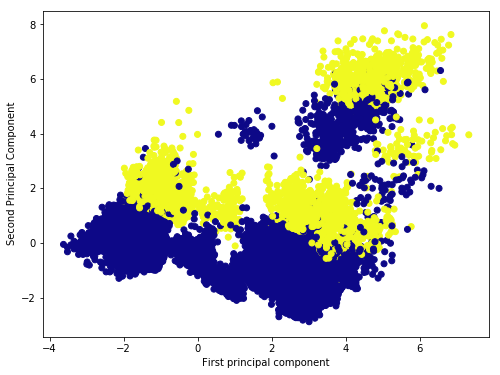

In [21]:
plt.figure(figsize=(8,6))
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.scatter(x_pca[:,0],x_pca[:,1],c=(df2[:, 20]), cmap='plasma')

In [22]:
pca.components_

array([[-0.01381146, -0.19866901,  0.28407555, -0.45172273, -0.3544881 ,
        -0.10211417, -0.45298601, -0.42952984,  0.04454807,  0.0141455 ,
         0.05999533,  0.04741998, -0.13116678,  0.04148469,  0.00075956,
        -0.25127275,  0.06062397, -0.0116588 , -0.09272483, -0.09479271,
         0.19574078],
       [ 0.12690216, -0.54172601,  0.16718706,  0.07355918,  0.2198413 ,
         0.31654296,  0.06429815, -0.06999497,  0.23506283,  0.04932636,
        -0.04862103,  0.02000061,  0.0179572 , -0.05307687, -0.0206505 ,
         0.20098234,  0.07242157,  0.04676502, -0.02827926,  0.48986452,
         0.38326582]])

In [23]:
df2_pcomp = pd.DataFrame(pca.components_, columns=[['age', 'p_days', 'Previous', 'emp_var_rate', 'cpi', 'cci', 'euribor', 'no_emp', 'duration', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'weekday', 'campaign', 'poutcome', 'yes_no']])

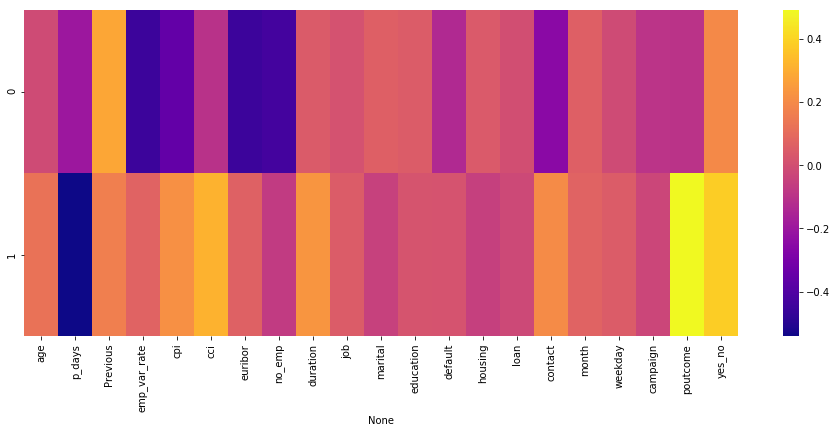

In [24]:
#we can use seaborn's heatmap plot which can help us make sense of PCA transformation.
#we see that the factors that influence the successful outcome the most are 'poutcome', 'cci', and 'duration'.

plt.figure(figsize=(16,6))
fig_pca2 = sns.heatmap(df2_pcomp,cmap='plasma',)